In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('fandango_scrape.csv')


## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?
Context:
https://fivethirtyeight.com/features/fandango-movies-ratings/


In [4]:
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
df.tail()

,FILM,STARS,RATING,VOTES
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0
503,Zarafa (2012),0.0,0.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

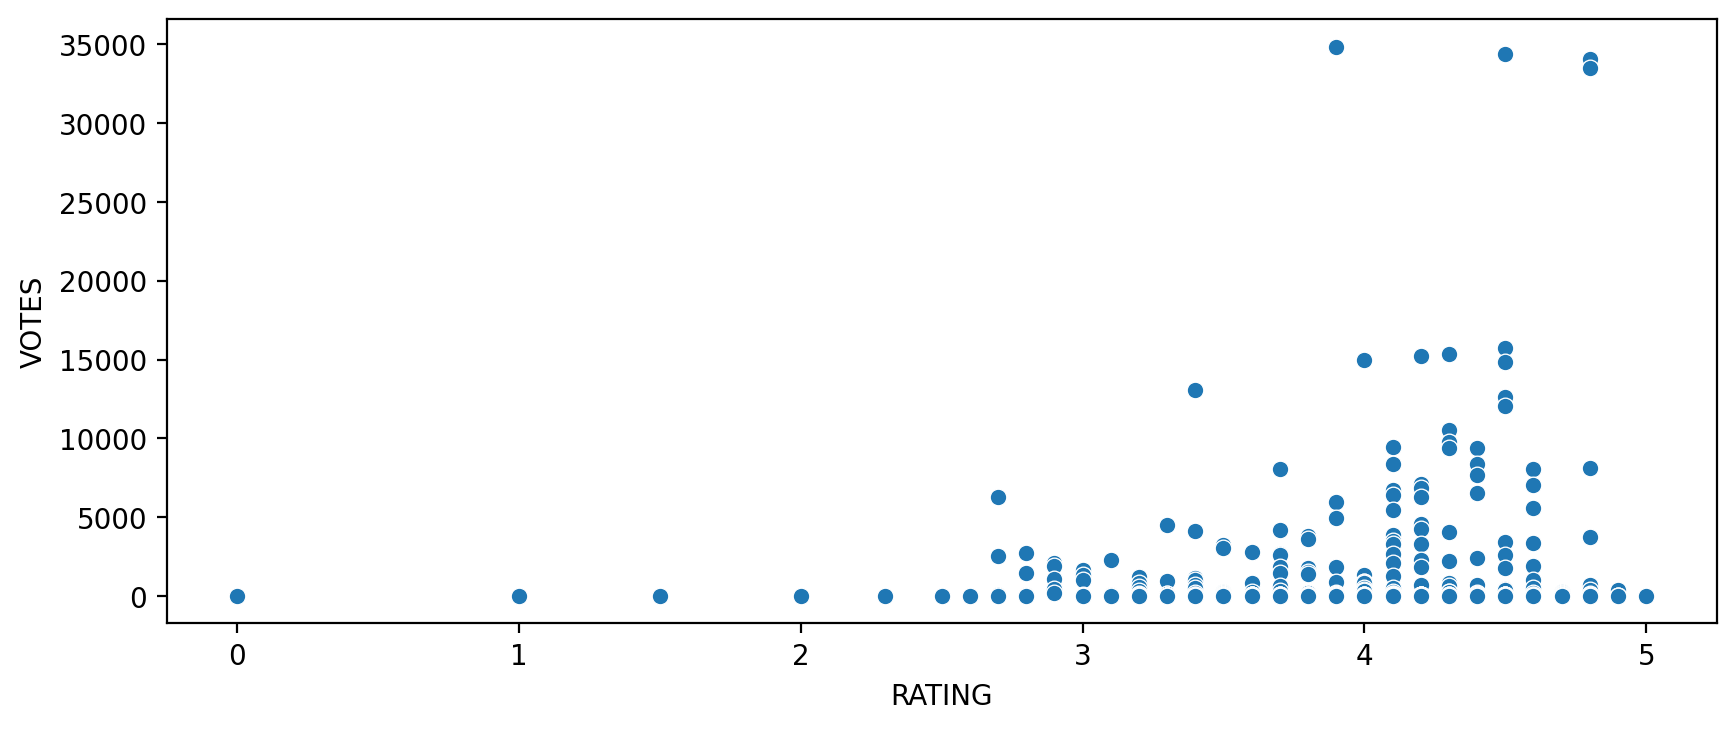

In [134]:
plt.figure(figsize=(10,4),dpi =200)#plt.figure(figsize=(10,4))
sns.scatterplot(x = df['RATING'],y = df['VOTES']) # Relation between rating and  votes fandangos #
#'rating and votes are directly proportional'

In [33]:
df.isnull().sum()

FILM      0
STARS     0
RATING    0
VOTES     0
dtype: int64

In [35]:
df.corr() # Correlation between columns

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [135]:
# function for cutting year in movie  name
def cut_string(word):
    return word[-5:-1]

In [66]:
df['Year']= df['FILM'].apply(cut_string)

In [75]:
df

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [76]:
df

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [82]:
df['Year'].value_counts() #movies per year 

2015    478
2014     23
2012      1
2016      1
1964      1
Name: Year, dtype: int64

d:\Users\Leandro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

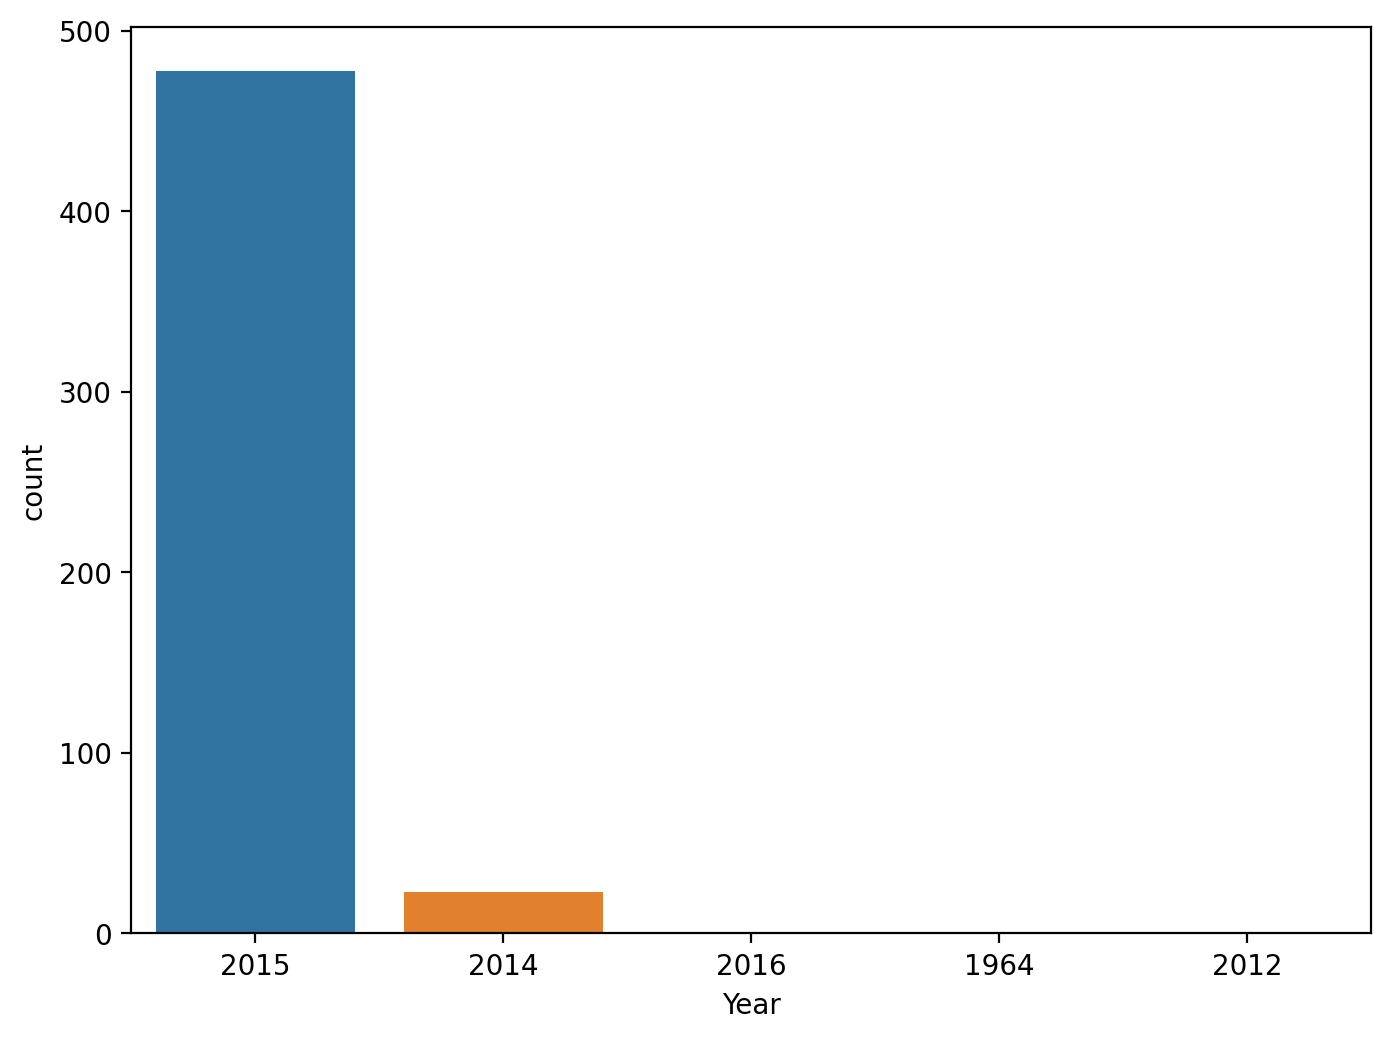

In [89]:
plt.figure(figsize = (8,6),dpi = 200)
sns.countplot(df['Year']) # unbalanced data

In [116]:
df.nlargest(13,columns = 'VOTES') #top 13 votes in fandango database

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [120]:
no_votes = (df['VOTES']==0).sum() 

In [121]:
no_votes

69

In [129]:
df[df['VOTES']==0] # movies that don't have vote

,FILM,STARS,RATING,VOTES,Year
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [137]:
df_new  = df[df['VOTES']>0] # REmove films with zero votes

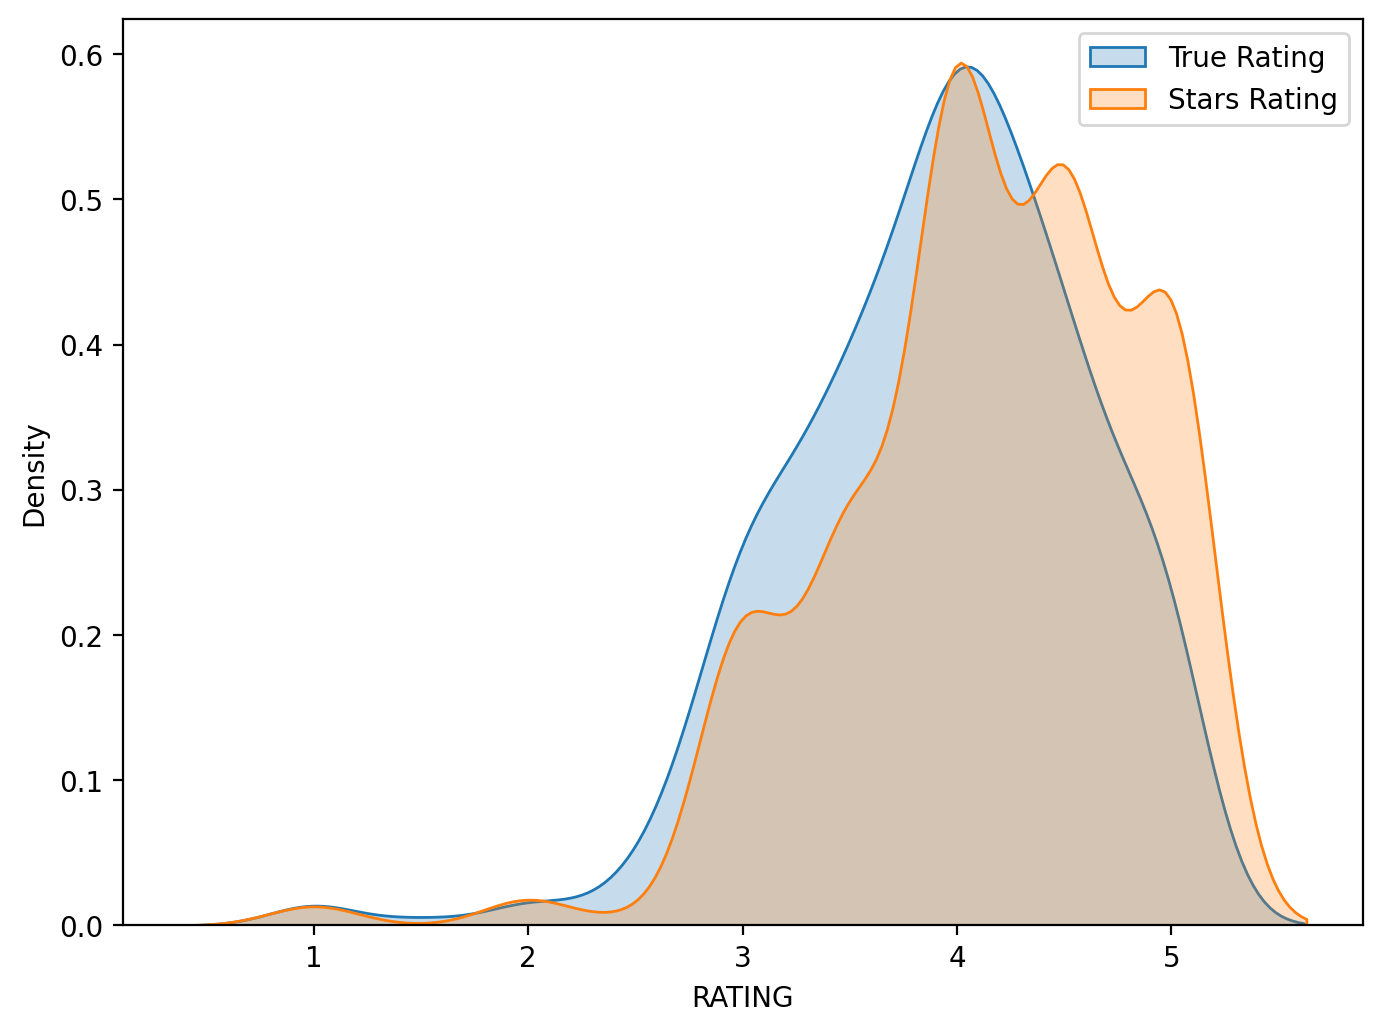

In [138]:
#Comparison between True rating and Stars rating
plt.figure(figsize=(8,6),dpi =200)
sns.kdeplot(data = df_new,x = 'RATING',fill= True,label= 'True Rating' )
sns.kdeplot(data = df_new,x = 'STARS',fill= True,label = 'Stars Rating')
plt.legend()

In [183]:
df['RATING_DIFF'] =abs(( df['RATING'] - df['STARS'])).round(2)

In [186]:
df

,FILM,STARS,RATING,VOTES,Year,RATING_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015,0.0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015,0.0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015,0.0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964,0.0


In [187]:
df['RATING_DIFF'].value_counts()

0.0    176
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: RATING_DIFF, dtype: int64

In [188]:
df['RATING_DIFF'].index

RangeIndex(start=0, stop=504, step=1)

d:\Users\Leandro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.1'),
  Text(2, 0, '0.2'),
  Text(3, 0, '0.3'),
  Text(4, 0, '0.4'),
  Text(5, 0, '0.5'),
  Text(6, 0, '1.0')])

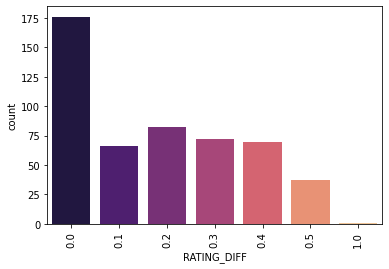

In [192]:
sns.countplot(df['RATING_DIFF'],palette='magma')
plt.xticks(rotation = 90)#plt.xticks(rotation=70)

In [194]:
df[df['RATING_DIFF']==1]# unique 5 stars movie


,FILM,STARS,RATING,VOTES,Year,RATING_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


#

In [6]:
df2 = pd.read_csv("all_sites_scores.csv")

In [7]:
df2

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [197]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [201]:
df2.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [200]:
df2.nlargest(13,columns = 'IMDB')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
140,Inside Out (2015),98,90,94,8.9,8.6,807,96252
76,Straight Outta Compton (2015),90,94,72,7.3,8.4,90,15982
95,The Salt of the Earth (2015),96,90,83,7.8,8.4,13,6605
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023
28,Wild Tales (2014),96,92,77,8.8,8.2,107,50285
42,About Elly (2015),97,86,87,9.6,8.2,23,20659
86,Me and Earl and The Dying Girl (2015),81,89,74,8.4,8.2,41,5269
96,Song of the Sea (2014),99,92,86,8.2,8.2,62,14067
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164
129,Amy (2015),97,91,85,8.8,8.0,60,5630


<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

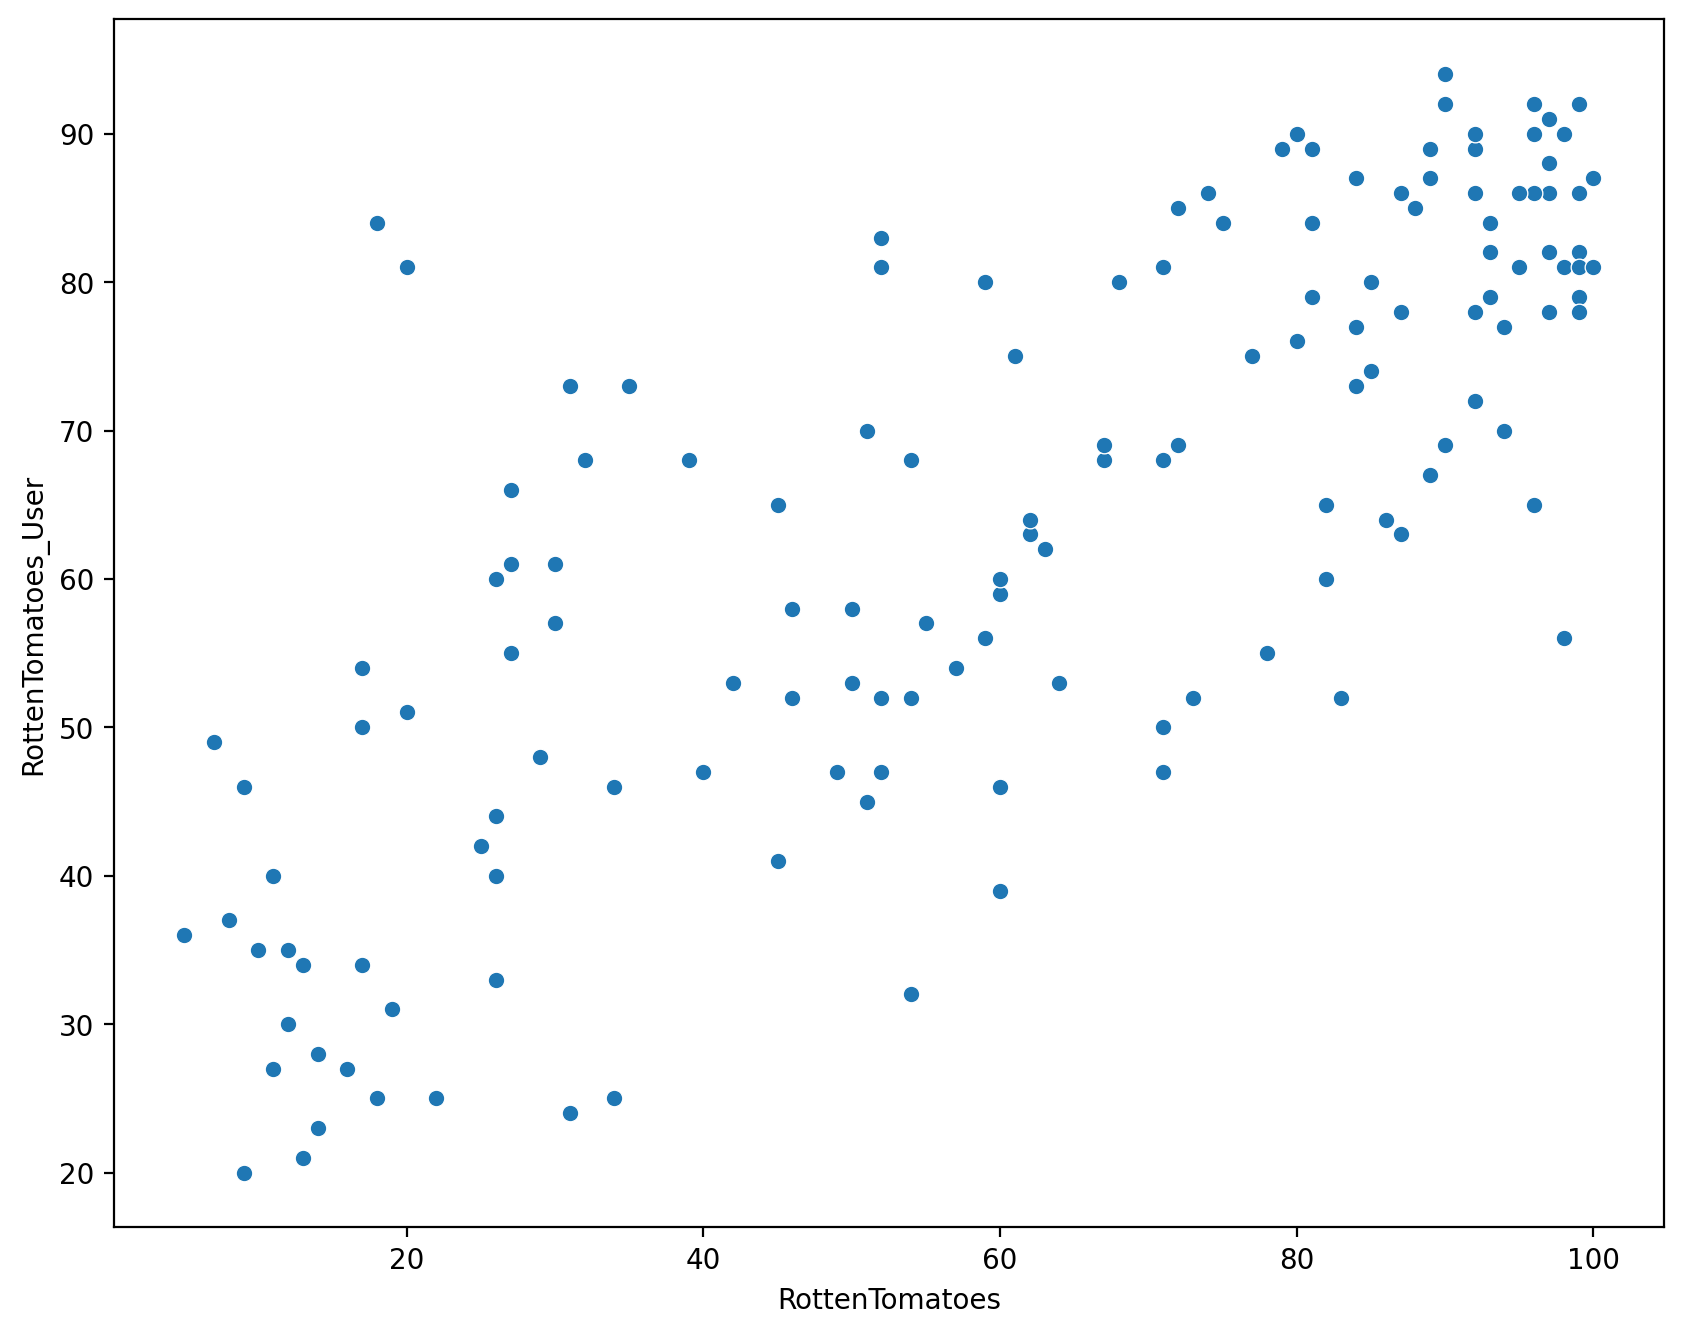

In [9]:
plt.figure(figsize=(10,8),dpi = 200)
sns.scatterplot(data=df2,x='RottenTomatoes',y='RottenTomatoes_User')

In [29]:
df2['diff_rating_tomatoes'] = (df2['RottenTomatoes_User'] - df2['RottenTomatoes'])

In [33]:
df2['diff_rating_tomatoes'].apply(abs).mean()

15.095890410958905

In [21]:
df2['diff_rating_tomatoes'].mean()

15.095890410958905

In [28]:
df2

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_rating_tomatoes
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Text(0.5, 1.0, 'Difference between RottenTomatoes users rating and RottenTomatoes Critics')

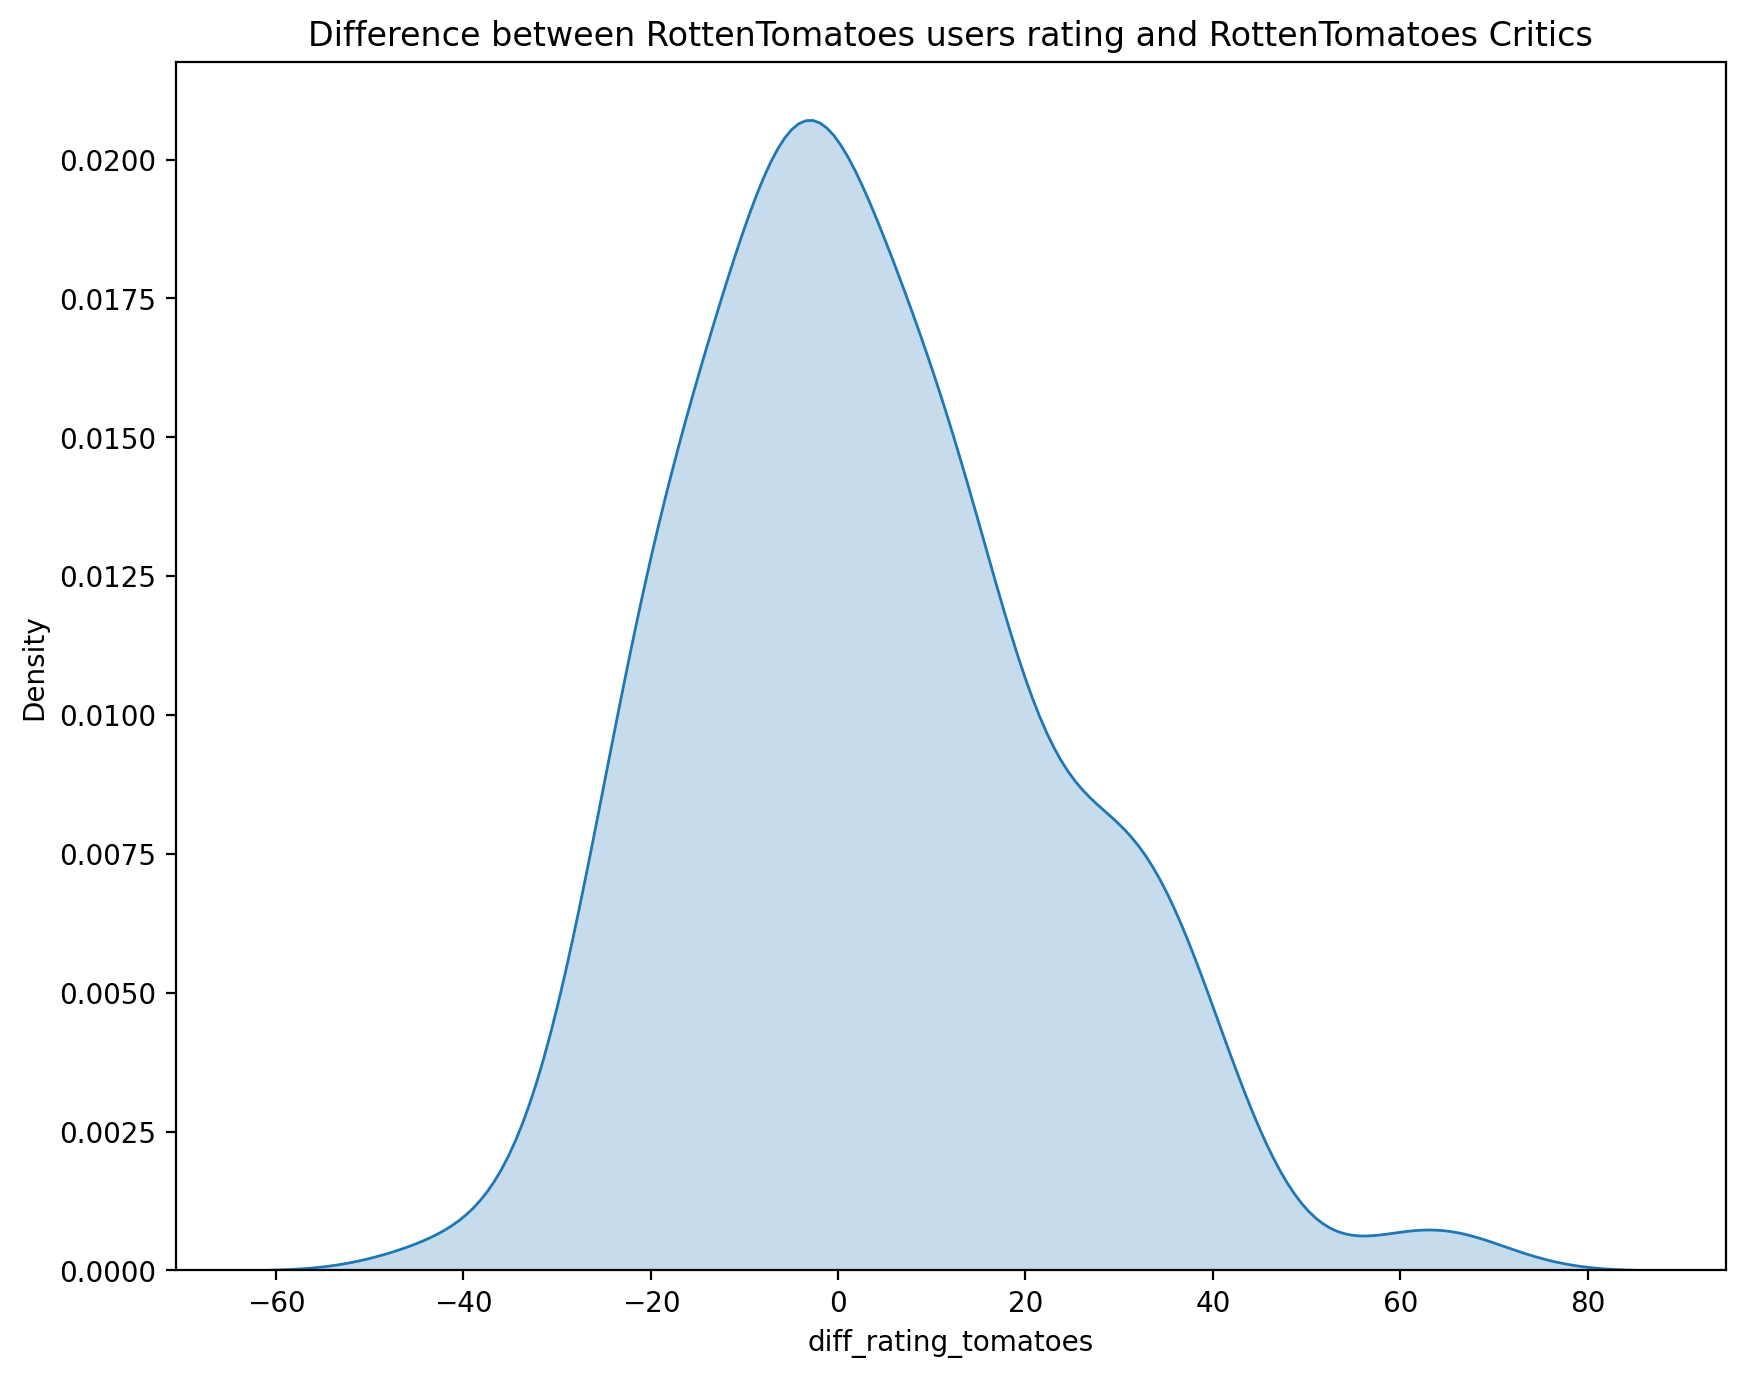

In [44]:
plt.figure(figsize=(10,8),dpi = 200)
sns.kdeplot(data = df2,x= 'diff_rating_tomatoes',fill = True)
plt.title(label = 'Difference between RottenTomatoes users rating and RottenTomatoes Critics')

In [52]:
df2

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_rating_tomatoes
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,-5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,-9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,-15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,-19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,-19


<AxesSubplot:ylabel='diff_rating_tomatoes'>

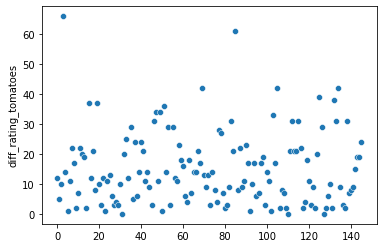

In [51]:
sns.scatterplot(data=df2['diff_rating_tomatoes'].apply(abs))

In [59]:
df2.nlargest(n=5,columns= 'diff_rating_tomatoes' ) # top5 movies that users  loves but critic hates.

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_rating_tomatoes
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,39


In [60]:
df2.nsmallest(n=5,columns= 'diff_rating_tomatoes' ) # top5 movies that critics  loves but users hates.

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_rating_tomatoes
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,-42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,-31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,-31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,-24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,-24


<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

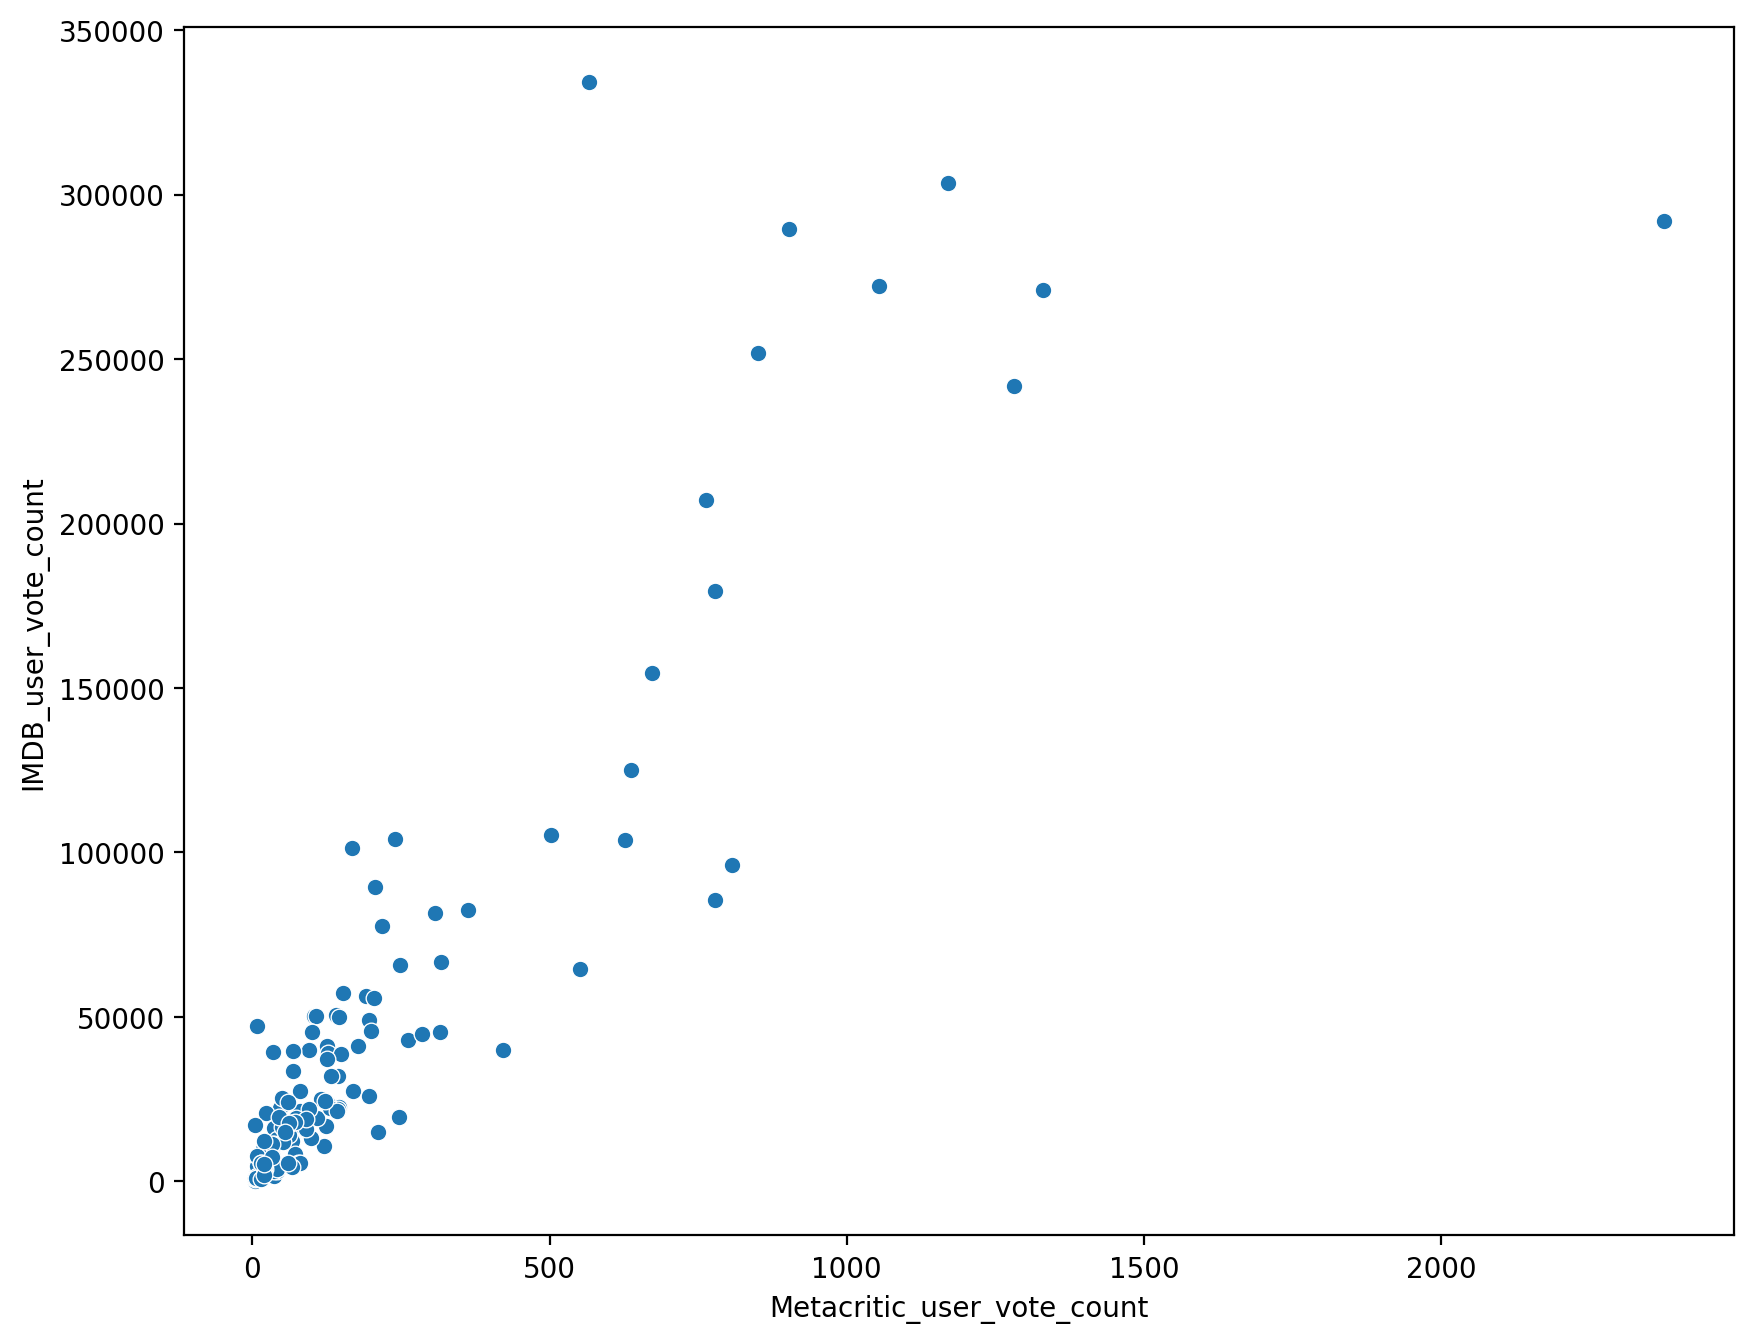

In [63]:
plt.figure(figsize=(10,8),dpi =200)
sns.scatterplot(x = df2['Metacritic_user_vote_count'],y = df2['IMDB_user_vote_count'])

In [82]:
df2.nlargest(1,columns='IMDB_user_vote_count') #Outlier is The Imitation Game(2014)that have highest IMDB user rating

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_rating_tomatoes
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,2


In [84]:
df2.nlargest(1,columns='Metacritic_user_vote_count')#Outlier is Mad Max: Fury Road (2015)that have highest MEtacritic user rating

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_rating_tomatoes
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,-9


In [86]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how: str = 'inner', on=None, left_on=None, right_on=None, left_index: bool = False, right_index: bool = False, sort: bool = False, suffixes=('_x', '_y'), copy: bool = True, indicator: bool = False, validate=None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allowed.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner', 'cross'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to 

In [88]:
df3 = pd.merge(df,df2,how = 'inner')

In [90]:
df3.info(),df2.info(),df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   RottenTomatoes              145 non-null    int64  
 5   RottenTomatoes_User         145 non-null    int64  
 6   Metacritic                  145 non-null    int64  
 7   Metacritic_User             145 non-null    float64
 8   IMDB                        145 non-null    float64
 9   Metacritic_user_vote_count  145 non-null    int64  
 10  IMDB_user_vote_count        145 non-null    int64  
 11  diff_rating_tomatoes        145 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 14.7+ KB
<class 'pandas.core.frame.DataFram

(None, None, None)

In [91]:
df3.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_rating_tomatoes
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,17
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,10
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,13
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,3
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,-8


In [92]:
# Normalize columns 
df3['Normal_RottenTomatoes'] = round(df3['RottenTomatoes']/20,1)


In [93]:
df3['Normal_RottenTomatoes_User'] = round(df3['RottenTomatoes_User']/20,1)

In [94]:
df3['Normal_Metacritc'] = round(df3['Metacritic']/20,1)

In [95]:
df3['Normal_MetacritcUsers'] = round(df3['Metacritic_User']/2,1)

In [96]:
df3['Normal_IMDB'] = round(df3['IMDB']/2,1)

In [97]:
df3

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff_rating_tomatoes,Normal_RottenTomatoes,Normal_RottenTomatoes_User,Normal_Metacritc,Normal_MetacritcUsers,Normal_IMDB
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,-8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,87,63,68,6.4,6.7,19,5289,-24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,95,81,87,6.3,7.0,18,1107,-14,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,93,84,67,7.0,7.8,4,732,-9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,95,86,86,7.3,7.4,14,696,-9,4.8,4.3,4.3,3.6,3.7


In [104]:
df3.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'diff_rating_tomatoes', 'Normal_RottenTomatoes',
       'Normal_RottenTomatoes_User', 'Normal_Metacritc',
       'Normal_MetacritcUsers', 'Normal_IMDB'],
      dtype='object')

In [108]:
normal_columns = df3[['STARS','RATING','Normal_RottenTomatoes','Normal_RottenTomatoes_User', 'Normal_Metacritc','Normal_MetacritcUsers', 'Normal_IMDB']]

In [109]:
normal_columns

,STARS,RATING,Normal_RottenTomatoes,Normal_RottenTomatoes_User,Normal_Metacritc,Normal_MetacritcUsers,Normal_IMDB
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


Text(0.5, 1.0, 'Comparison between normalized datas ')

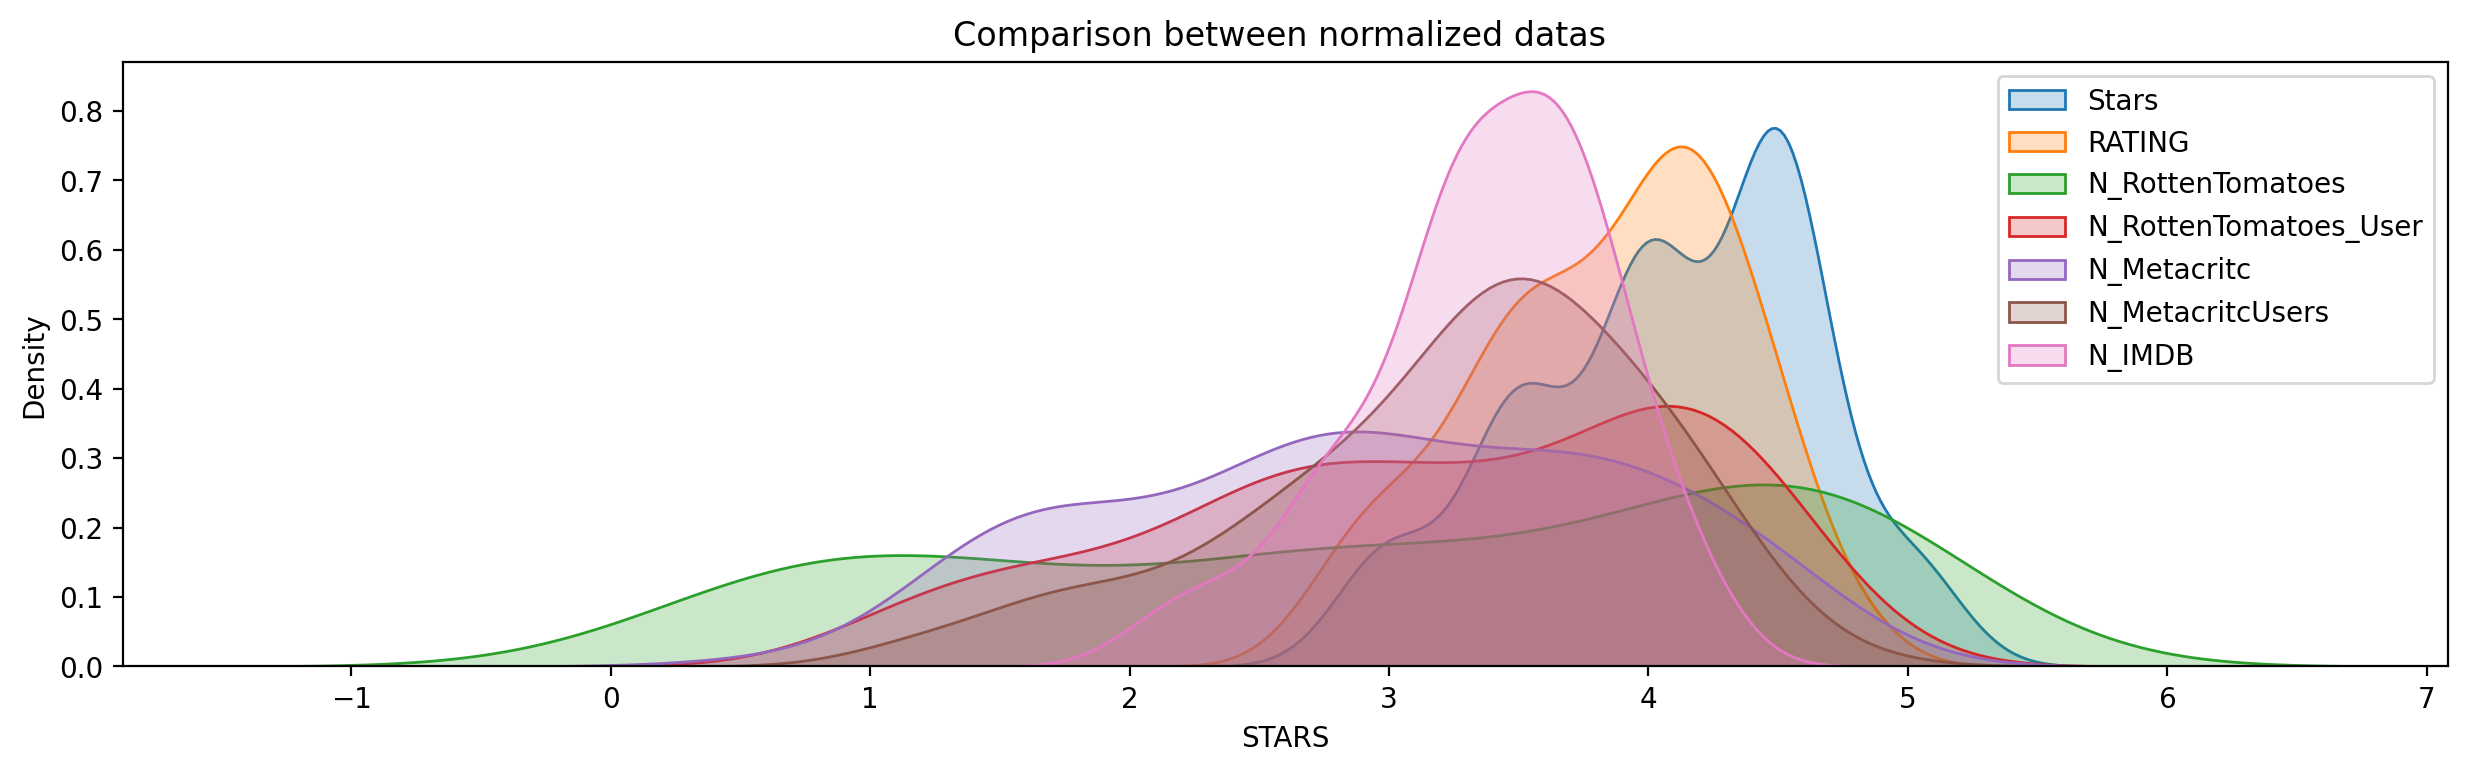

In [131]:
plt.figure(figsize=(15,4),dpi=200)
sns.kdeplot(data = df3,x='STARS',fill=True,label='Stars')
sns.kdeplot(data = df3,x='RATING',fill=True,label='RATING')
sns.kdeplot(data = df3,x='Normal_RottenTomatoes',fill=True,label='N_RottenTomatoes')
sns.kdeplot(data = df3,x='Normal_RottenTomatoes_User',fill=True,label='N_RottenTomatoes_User')
sns.kdeplot(data = df3,x='Normal_Metacritc',fill=True,label='N_Metacritc')
sns.kdeplot(data = df3,x='Normal_MetacritcUsers',fill=True,label='N_MetacritcUsers')
sns.kdeplot(data = df3,x='Normal_IMDB',fill=True,label='N_IMDB')
plt.legend()
plt.title('Comparison between normalized datas ')

## Fandango is showing around 3-4 star ratings for films that are clearly bad!

In [133]:
#Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.